# Lab Week 3: The mathematical building blocks of neural networks

This lab is based on the materials of the second chapter the course text book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) (See D2l -> Course Information -> Text Book.)

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the MNIST dataset in Keras

In [1]:
from tensorflow.keras.datasets import mnist
(train_images_orig, train_labels), (test_images_orig, test_labels) = mnist.load_data()

/Users/daekyungpark/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [13]:
train_images_orig.shape # the shape is (b, w, h)

(60000, 28, 28)

In [14]:
train_images_orig.ndim

3

## The shape of image data

**Note:** For black-and-white images, the number of channels equals 1, so it is not explicitly mentioned in the data.

- color images shape: (samples_n, channel_n, hight, width)
- gray images shape: (sample_n, hight, width)


![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/image_data.png)

## Exploring the dataset

sample image shape:  (28, 28)
sample image data type:  <class 'numpy.ndarray'>
printing the numerical value of a sample image
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   12 228  49   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  103 254  73   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  158 217   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  24   0   0  

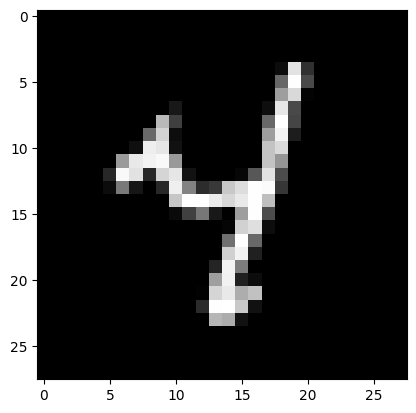

In [15]:
# Note: run this cell multiple times
index = np.random.randint(0, 60000)
sample_image = train_images_orig[index]

print("sample image shape: ", sample_image.shape)
# type function returns the type of the (sample_image) -> data type
print("sample image data type: ", type(sample_image))


print("=" * 100)
print("printing the numerical value of a sample image")
print(sample_image)

# aligning the pixel values in the output
print("=" * 100)
for row in sample_image:
  print("".join([str(elem).ljust(3) for elem in row]))

print("=" * 100)
plt.imshow(sample_image, cmap="gray")
plt.show()


In [16]:
len(train_labels)
# print len of the train_lables

60000

In [17]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images_orig.shape # -> .shape is used to get the shape of the array.

(10000, 28, 28)

In [19]:
len(test_labels)

10000

In [20]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### **Exercise 1:** Display the fourth image in the `test set` with its label.

Label: 0


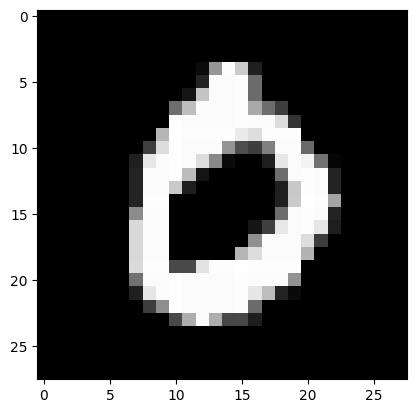

In [21]:
#your code here

print(f"Label: {test_labels[3]}")
plt.figure()
plt.imshow(test_images_orig[3], cmap="gray")  # Optioanl to use : cmap="gray"

                                              # But it is in line with the concept of reducing the amount of data in an image
                                              # to only the data that helps the algorithm determine the answer/label/target


# A first look at a neural network

## **Step 1:** The network architecture

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([  # similar to when we used a constructor from sklearn using ....new DecisionTreeClassifier()
    layers.Dense(512, activation="relu"),v  # we've chosen 512 nodes for the hidden layer ( 1st Dense layer)
    layers.Dense(10, activation="softmax") # Faster convergence ( updates the weights) during training
])                                        # only 10 nodes in the last Dense layer - 1 dummy value for each possible label
                                          # Exponentially scaled - bigger values get exponentiallyy bigger
                                          #                      - Smaller values get exponentially smaller

<img src="https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/architecture.png" width="1000" height="400">

### **Input layer** - Preparing the image data

**Note: The nodes in the `Input layer` are not neurons. They are pixel values.**

In [23]:
train_images = train_images_orig.reshape((60000, 28 * 28))

# train_images_orig and test_images_ori store the original image data.
# Each image in the MINIST dataset is a 28 x 28 pixel grayscale image.

# we want to NORMALIZE the data by dividing by the total value so we can get
# Each value as a number between 0 and 1
# makes it more efficient to train and update the weights
train_images = train_images.astype("float32") / 255

# astype("float32") -> converts the data type of the image to float32
test_images= test_images_orig.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255


# why reshape ?
# Neural networks, particularly those using Dense layers, tpically expect their input data
# as a 1-diemnsional vector. reshaping converts the image data into this format
# making it compatible with the network's input requirements

### **Exercise 2:** What is the shape of data after preprocessing

In [24]:
#your code here

print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


### Tensor reshaping

In [25]:
a = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
a.shape

(3, 2)

### **Exercise 3:** reshape the `a` matrix to 6 x 1 matrix.

In [26]:
#your code here
a_reshaped = a.reshape((6, 1))
a_reshaped


array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

### **Hidden layer** with `relu` activation function

Each neuron in the hidden layer, as illustrated in the figure below, comprises two main components: the summation function and the activation function.

In our architecture, we have 512 neurons in the hidden layer.

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/relu.webp with="500" height="300">

**The preferred activation function for hidden layers is `relu`. The mathematical function of ReLU is as follows:**

$$
relu(x) = max(0, x)
$$

> **Note: ReLU is considered as one of the biggest breakthroughs in deep learning because ReLU makes it possible to train a very deep neural network. It has solved the `vanishing gradient` challenge in `deep` networks with many hidden layers.**


### **Exercise 4** Write a function that takes a number/array `x` and returns `relu(x)`. Use the `np.maximum()` method in your function. Then, plot this function for x in the range of -5 to 5.

In [27]:
# Define a Relu function (rectified linear unit - activiation function (one efficient (but simple) ))
#your code here
def relu(x):
  # It classifies anything zero or less as ouput zero
  # It classifies anything more than zero as  the original value

  output = np.maximuym(0, x)
  return output

In [28]:
# my solution output

### **Ecercise 5:** Suppose that I have 5 neurons in my hidden layer. After the summation stage, the result of this layer is `[-10, 5, 0, -2, 6]`. What is the result after passing this through the ReLU activation function?

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-relu.png)

your answer here:

### **Output layer** - `Sigmoid` and `Softmax` activation function

Each neuron in the last layer of the neural network should output a number between 0 and 1 because each neuron represents the probability of the input belonging to a specific class.

**Important Note:** The values of the neurons in the last layer before applying the activation function are called `logits` or `scores`.

One way to achieve this is by using the sigmoid activation function.

The sigmoid function takes an input
`x` and outputs a number between 0 and 1.

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

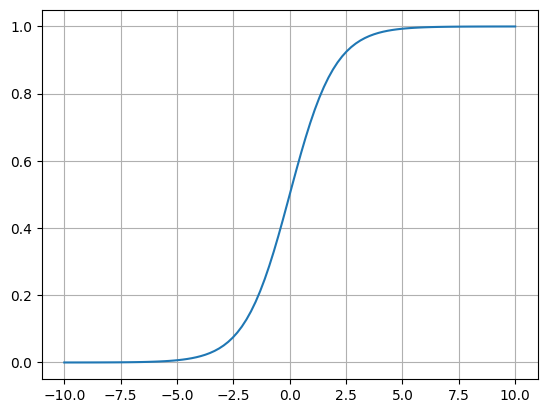

In [29]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    # This is the core of the sigmoid function
    # it calculates the sigmoid value of x using the following formula
    # σ(x) = 1 / (1 + e-x)


x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.grid()
plt.show()

### **Exercise 6:** Using the sigmoid function defined in the previous cell, suppose the last layer of a neural network has 4 neurons with the following values: [3.2, 1.3, 0.2, 0.8].
  - Apply the sigmoid function to these values to map them to numbers between 0 and 1.
  - Then, generate a bar plot of the scaled values.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-sigmoid.png)

In [30]:
# we call value of the last layer before applying activation func as logits
logits = np.array([3.2, 1.3, 0.2, 0.8])
#your code here
logits_scaled = sigmoid(logits)
print(logits_scaled)

#you code here for plotting
plt.barplot(x=np.arrange(4), y=logits_scaled, hue=np.arrange(4), palette="Set1", legend=False)
plt.xticks(np.arange(4))
plt.show()

[0.96083428 0.78583498 0.549834   0.68997448]


AttributeError: module 'matplotlib.pyplot' has no attribute 'barplot'

[0.96083428 0.78583498 0.549834   0.68997448]


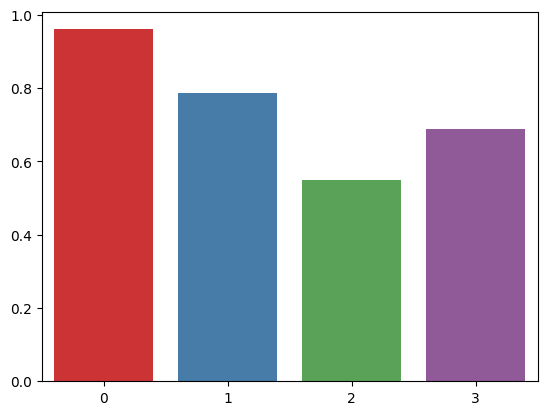

In [ ]:
#my solution output

This plot shows the probability distribution over labels. However, there is an issue here: with the sigmoid function, each output is independent and bounded between 0 and 1, but their sum is not constrained to equal 1. To address this, we use the softmax function, which normalizes the outputs so that they sum to 1, ensuring a valid probability distribution over the labels.


$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^N e^{x_j}}
$$

In [ ]:
def softmax(x):
  """
  input x is a vector representing the output of the last layer of a neural network
  """
  return np.exp(x)/sum(np.exp(x))

### **Exercise 7:** Pass the logits defined in Exercise 6 from the softmax function and plot the probability distribution over the labels.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-softmax.png)

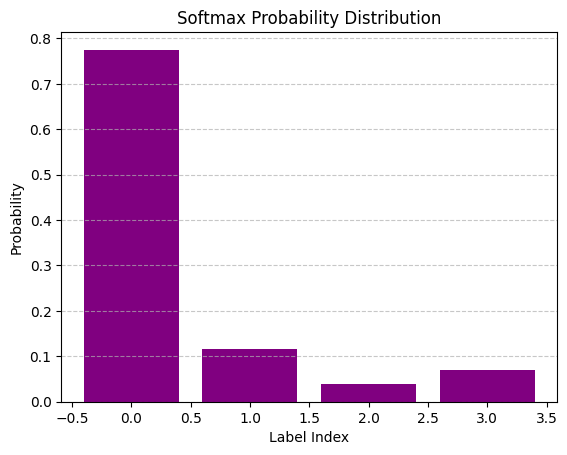

In [ ]:
#your code here
logits = np.array([3.2, 1.3, 0.2, 0.8])
probs = softmax(logits)
plt.bar(range(len(probs)), probs, color='purple')
plt.title("Softmax Probability Distribution")
plt.xlabel("Label Index")
plt.ylabel("Probability")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

[0.77514955 0.11593805 0.03859242 0.07031998]
sum of all probs:  1.0000000000000002


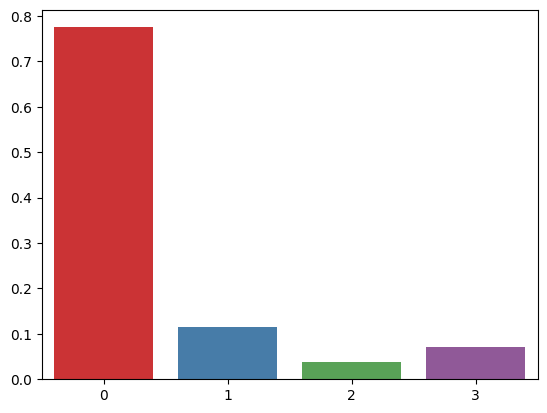

In [ ]:
#my solution output

### Exercise 8: Given the `probs` you calculated in the previous Exercise, find the predicted label using `np.argmax()` method.

In [ ]:
#your code here
predicted_class = np.argmax(probs)
predicted_class

0

> **To summarize so far, the input to the neural network is, for example, an image, and the output is the probability distribution over the labels.**

> **You can try [Google Teachable Machine](https://teachablemachine.withgoogle.com/train/image) to explore this concept further.**

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/overal_logit-softmax.png height="650" width="650" >




In the next steps, we will train the neural network defined in step 1. By training the network, we optimize the weights between the neurons.

## **Step 2:** The compilation step

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## **Step 3:** "Fitting" the model

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8745 - loss: 0.4402
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9655 - loss: 0.1193
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9792 - loss: 0.0716
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9851 - loss: 0.0489
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9891 - loss: 0.0370


## **Step 4:** Using the model to make predictions

In [ ]:
test_digits = test_images[:3] #predictiong the label of test_image[0] , test_image[1], test_image[2]
predictions = model.predict(test_digits)
predictions

ValueError: Sequential model sequential_1 cannot be built because it has no layers. Call `model.add(layer)`.

### **Exercise 9:** Interpret the values in the `prediction`array.  

your answer here:

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

ValueError: You must call `compile()` before using the model.

### See the result for the prediction of the first image

In [ ]:
print(predictions[0])
predicted_label = np.argmax(predictions[0])
print("Predicted label: ", predicted_label)

NameError: name 'predictions' is not defined

In [ ]:
print("highest prob: ", predictions[0][7])

highest prob:  0.9933248


In [ ]:
true_label = test_labels[0]
print("True label: ", true_label)

True label:  7


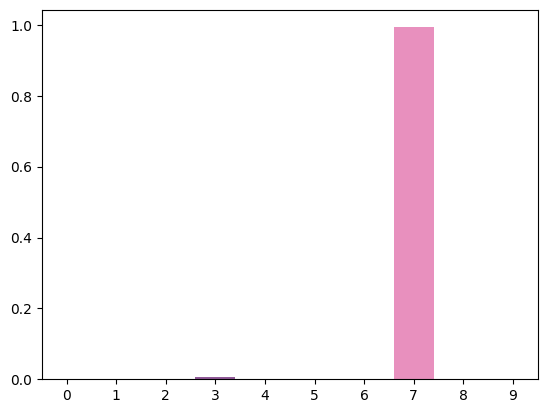

In [ ]:
# plt.bar(np.arange(10), predictions[0])
sns.barplot(x=np.arange(10), y=predictions[0], hue=np.arange(10), palette='Set1', legend=False)
plt.xticks(np.arange(10))
plt.show()

> **So, the output distribution of the model is very close to our ideal distribution, which is [0, 0, 0, 0, 0, 0, 0, 1, 0, 0].**



### **Exercise 10:** Predict the label of the fourth element of the test set.

**Important Note: Neural networks are designed to predict labels for a batch of data. For example, in the previous section, we predicted labels for a batch of four images, where the input shape was (4, 784). Similarly, when working with a single image, it must be fed into the network in the batch format with a shape of (1, 784).**

In [ ]:
#your code here


ValueError: Sequential model sequential_1 cannot be built because it has no layers. Call `model.add(layer)`.

## **Step 5:** Evaluating the model on new data

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9776 - loss: 0.0736
test_acc: 0.9807999730110168


**Note:** We will discuss `optimizer`, `loss`, `epoch`, and `batch` in more depth in the coming weeks.